# Red Neuronal (Perceptron Multicapa)

In [1]:
# Importacion de recursos
import numpy as np
import pandas as pd
from services.transformaciones import CargaDatos
from config.parametros import RutaDataSet as RT
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [2]:
# Importar la matriz X
X_matriz = CargaDatos('Archivos')
X = X_matriz.leer_matriz_numpy(nombre_matriz=RT.X)
X.shape

(16170, 57)

In [3]:
# Importar la matriz y
y_matriz = CargaDatos('Archivos')
y = y_matriz.leer_matriz_numpy(nombre_matriz=RT.y)
y.shape

(16170,)

In [4]:
# Importar la matriz e que contiene las etiquetas de la matriz
e_matriz = CargaDatos('Archivos')
e = e_matriz.leer_matriz_numpy(nombre_matriz=RT.e)
e.shape

(16170,)

In [5]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test, e_train, e_test = train_test_split(X, y, e, test_size=0.3, random_state=42)


In [6]:
# Crear el modelo de red neuronal
model = Sequential()
# Capa de entrada (con capa oculta)
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
# Capa oculta
model.add(Dense(16, activation='relu'))
# Capa de salida
model.add(Dense(1, activation='sigmoid'))
# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


d:\Proyectos\Personal\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8321 - loss: 0.4180 - val_accuracy: 0.8966 - val_loss: 0.2851
Epoch 2/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8968 - loss: 0.2774 - val_accuracy: 0.8993 - val_loss: 0.2790
Epoch 3/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8960 - loss: 0.2780 - val_accuracy: 0.8989 - val_loss: 0.2805
Epoch 4/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9006 - loss: 0.2743 - val_accuracy: 0.8975 - val_loss: 0.2784
Epoch 5/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9027 - loss: 0.2737 - val_accuracy: 0.8971 - val_loss: 0.2773
Epoch 6/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8985 - loss: 0.2768 - val_accuracy: 0.8949 - val_loss: 0.2772
Epoch 7/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9020 - loss: 0.2725 - val_accuracy: 0.8936 - val_loss: 0.2788
Epoch 8/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9013 - loss: 0.2735 - val_accuracy: 0.

In [8]:
# Evaluar el modelo
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.2f}")
print("Informe de clasificación:")
print(report)


152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
Precisión del modelo: 0.89
Informe de clasificación:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      4269
         1.0       0.58      0.26      0.36       582

    accuracy                           0.89      4851
   macro avg       0.74      0.62      0.65      4851
weighted avg       0.87      0.89      0.87      4851



# Evaluacion del modelo usando AUC 
(Área Bajo la Curva ROC)

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
AUC-ROC: 0.78


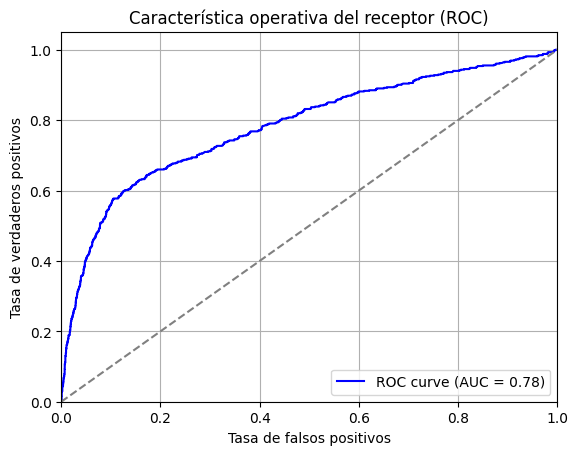

In [9]:
# Hacer predicciones de probabilidad en el conjunto de prueba
y_prob = model.predict(X_test).flatten()

# Calcular el AUC-ROC
auc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc:.2f}')
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Trazar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Característica operativa del receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

* Evaludacion del modelo:
El modelo muestra un resultado de 0.78 lo que indica un capacidad moderadamente acertiva para clasificar los datos de cliente que tomarian o no un CDT

# Generar DataFrame con las salidas

In [10]:
# Hacer predicciones en el conjunto de prueba
y_prob = model.predict(X_test).flatten()

# Crear un DataFrame con los IDs y las probabilidades predichas
resultados = pd.DataFrame({
    'ID': e_test.flatten(),
    'y': y_prob
})
resultados.to_csv(RT.RedNeuronal,encoding='utf-8',sep=',',index=False)

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
